In [1]:
#importing essential python packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')

In [2]:
#importing dataset for analysis:

bh = pd.read_csv('S:\Desktop\Datascienceclass\DataSets\Project\Housingdata.csv')
bh.head(20)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
# As we can see some NAN values:
#we need to know how much data is missing from the overall data set

missing_values_count = bh.isnull().sum()
missing_values_count[0:14]


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
#checking the statistic data of Raw data set

bh.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
bh.shape

(506, 14)

In [6]:
bh.size

7084

In [7]:
bh.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
#Knowing the missing datas in percentage:

total_cells = np.product(bh.shape)
total_missing = missing_values_count.sum()
(total_missing/total_cells) * 100

1.693958215697346

In [9]:
(bh.iloc[:,1:14] == 0).sum()

ZN         360
INDUS        0
CHAS       452
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

In [10]:
# Replacing '0' values with 'NaN':

for i in range(1,14):
    bh.iloc[:, i].replace(0, np.nan, inplace=True)
    (bh.iloc[:,1:14] == 0).sum()

In [11]:
# Rechecking for '0' values :

(bh.iloc[:,1:14] == 0).sum()

ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
bh.head(25)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,NaN,2.18,NaN,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,NaN,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,NaN,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [13]:
scd = bh.dropna()
bh.shape

(506, 14)

In [14]:
# Imputing mean values to missing values of each columns:

mbh = bh.mean()
nbh = bh.fillna(mbh)
nbh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,1.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,43.246032,7.07,1.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,43.246032,7.07,1.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,43.246032,2.18,1.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,43.246032,2.18,1.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [15]:
nbh.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,43.246032,11.083992,1.0,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,13.406100,6.699165,0.0,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,12.500000,0.460000,1.0,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,43.246032,5.190000,1.0,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,43.246032,9.900000,1.0,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,43.246032,18.100000,1.0,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.0,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
target_variable = nbh['MEDV']

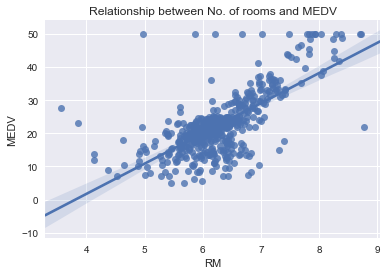

In [17]:
# Visualising Dataset for analysis:
#Between no.of rooms and MEDV:

sns.set(style="darkgrid")
sns.regplot(x="RM",y="MEDV", data=nbh, fit_reg= True)
plt.title("Relationship between No. of rooms and MEDV")
plt.show()

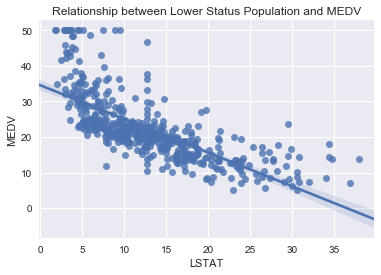

In [18]:
# Between Lower Status Population and MEDV:

sns.set(style="darkgrid")
sns.regplot(y="MEDV",x="LSTAT", data=nbh, fit_reg= True)
plt.title("Relationship between Lower Status Population and MEDV")
plt.show()

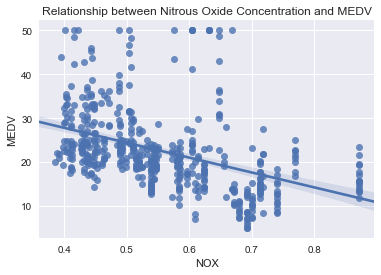

In [19]:
#Between Nitrous Oxide Concentration and MEDV:

sns.set(style="darkgrid")
sns.regplot(y="MEDV",x="NOX", data=nbh, fit_reg= True)
plt.title("Relationship between Nitrous Oxide Concentration and MEDV")
plt.show()

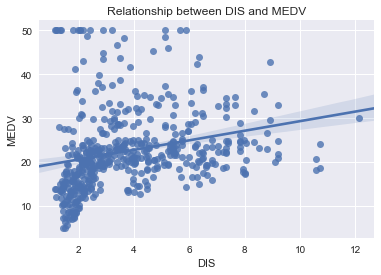

In [20]:
# Between DIS and MEDV:

sns.set(style="darkgrid")
sns.regplot(y="MEDV",x="DIS", data=nbh, fit_reg= True)
plt.title("Relationship between DIS and MEDV")
plt.show()

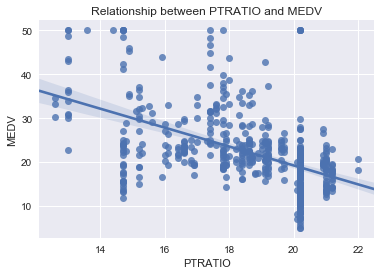

In [21]:
#Between PTRATIO and MEDV:

sns.set(style="darkgrid")
sns.regplot(y="MEDV",x="PTRATIO", data=nbh, fit_reg= True)
plt.title("Relationship between PTRATIO and MEDV")
plt.show()

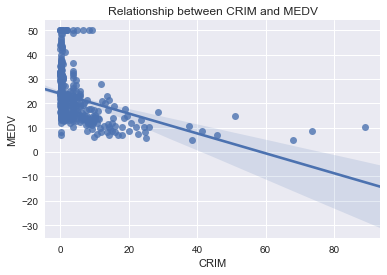

In [22]:
# Between MEDV and crime rates :

sns.set(style="darkgrid")
sns.regplot(y="MEDV",x="CRIM", data=nbh, fit_reg= True)
plt.title("Relationship between CRIM and MEDV")
plt.show()

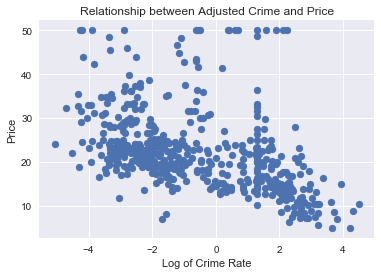

In [23]:
adj_CRIM = np.log(nbh.CRIM)
plt.scatter(adj_CRIM , nbh.MEDV)
plt.xlabel("Log of Crime Rate")
plt.ylabel("Price")
plt.title("Relationship between Adjusted Crime and Price")
plt.show()

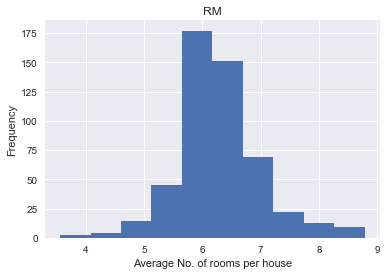

In [24]:
# Distribution of "No.of rooms per house" RM:

plt.hist(nbh.RM , histtype='barstacked')
plt.xlabel("Average No. of rooms per house")
plt.ylabel("Frequency")
plt.title("RM")
plt.show()


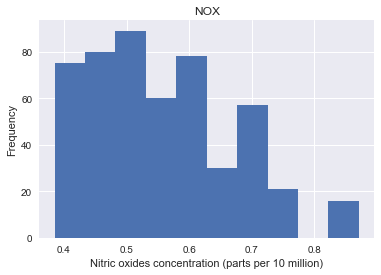

In [25]:
# Distribution of NOX concentration :

plt.hist(nbh.NOX , histtype = 'barstacked')
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Frequency")
plt.title("NOX")
plt.show()

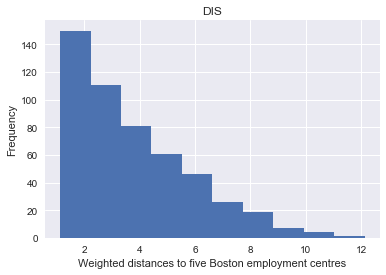

In [26]:
#Distribution of weighted distances to five Boston employment centres :

plt.hist(nbh.DIS ,histtype = 'barstacked')
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequency")
plt.title("DIS")
plt.show()

In [27]:
#Correlation between the target variables :

nbh['CRIM'] = np.log(nbh['CRIM'])
cbh = nbh.iloc[:,[0,4,5,7,10,12]]
cbh.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
CRIM,1.000000,0.756191,-0.289809,-0.648218,0.343296,0.578917
NOX,0.756191,1.000000,-0.302188,-0.769230,0.188933,0.572379
RM,-0.289809,-0.302188,1.000000,0.205246,-0.355501,-0.602962
DIS,-0.648218,-0.769230,0.205246,1.000000,-0.232471,-0.483429
PTRATIO,0.343296,0.188933,-0.355501,-0.232471,1.000000,0.373343
LSTAT,0.578917,0.572379,-0.602962,-0.483429,0.373343,1.000000


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [29]:
#Summarizing ols Regression results:

m = ols('MEDV ~ PTRATIO + NOX + RM + LSTAT + DIS ', nbh).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     231.6
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.26e-127
Time:                        19:45:51   Log-Likelihood:                -1537.0
No. Observations:                 506   AIC:                             3086.
Df Residuals:                     500   BIC:                             3111.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4342      4.683      7.781      0.0

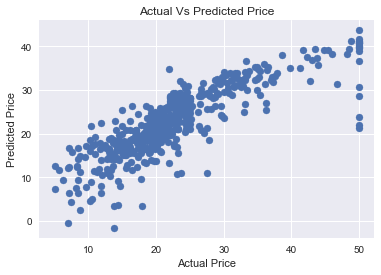

In [30]:
# Scatter plot of"Actual Vs Predicted Price" :

predicted_prices = m.fittedvalues
plt.scatter(  nbh.MEDV , predicted_prices)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Price")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X = nbh.drop('MEDV', axis = 1)
Y = nbh['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33,random_state = 5 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


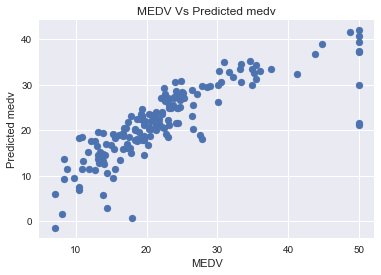

In [32]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

Y_pred = LinReg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MEDV")
plt.ylabel("Predicted medv")
plt.title("MEDV Vs Predicted medv")
plt.show()

In [33]:
print("Coefficients: \n", LinReg.coef_)
print(LinReg.score(X_test , Y_test))

Coefficients: 
 [-8.71595426e-04  2.14001709e-02 -9.26483014e-02 -6.58154087e-15
 -1.15175573e+01  4.23246406e+00 -1.74298286e-02 -1.12219021e+00
  2.45877646e-01 -1.22340352e-02 -1.06559357e+00  1.16906481e-02
 -4.67853361e-01]
0.6817964127207743


In [34]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse

29.82963172115551

C:\Users\User\Anaconda3\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


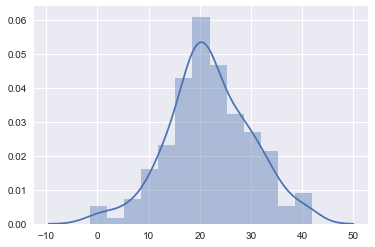

In [35]:
sns.distplot(Y_pred)

In [36]:
X1 = nbh[['NOX','RM','DIS','PTRATIO','LSTAT' ]]
Y1 = nbh['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size =0.33,random_state = 5 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 5)
(167, 5)
(339,)
(167,)


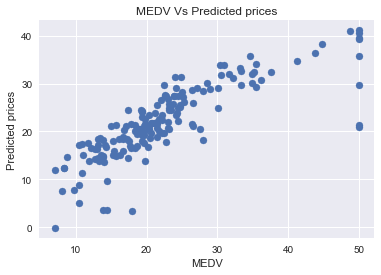

In [37]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

Y_pred = LinReg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MEDV")
plt.ylabel("Predicted prices")
plt.title("MEDV Vs Predicted prices")
plt.show()

In [38]:
print(LinReg.score(X_test , Y_test))
cv_results = sklearn.model_selection.cross_val_score(LinReg, X_train, Y_train, cv = 5, scoring = 'r2')
msg = "%s: %f (%f)" % ('r2 score', cv_results.mean(),cv_results.std())
print(msg)

0.6770433232470321
r2 score: 0.684807 (0.037280)


In [43]:
print(sklearn.metrics.mean_absolute_error(Y_test, Y_pred))
print(np.sqrt(mse))

3.6431210873426205
5.46165100689851


In [46]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(Y_test , Y_pred)
spearman = spearmanr(Y_test, Y_pred)
pearson = pearsonr(Y_test, Y_pred)
print("Out of Bag R2 Score" , rf.oob_score_)
print("Test Data R2 Score:" , test_score)
print("Test Data Spearman Correlation:" ,  round(spearman[0], 3))
print("Test Data Pearson Correlation" , round(pearson[0],3))

Out of Bag R2 Score 0.7825889228044421
Test Data R2 Score: 0.8837350207137451
Test Data Spearman Correlation: 0.916
Test Data Pearson Correlation 0.942
